In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q supervision
!pip install --upgrade ultralytics
!pip install -q git+https://github.com/THU-MIG/yolov10.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 713.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!ls -lh {HOME}/weights

total 43M
-rw-r--r-- 1 root root 11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root 32M May 23 09:38 yolov10s.pt


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="...")
# project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
# version = project.version(14)
# dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in coco:: 100%|██████████| 7343/7343 [00:01<00:00, 6628.24it/s]


In [4]:
from ultralytics import YOLO

In [5]:
model = YOLO("/content/{HOME}/weights/yolov10s.pt")
results = model.train(data="/content/drive/MyDrive/Datasets/rock-paper-scissors-14/data.yaml", epochs=15, imgsz=320, batch=32)

New https://pypi.org/project/ultralytics/8.2.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=/content/{HOME}/weights/yolov10s.pt, data=/content/drive/MyDrive/Datasets/rock-paper-scissors-14/data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=320, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

train: Scanning /content/drive/MyDrive/Datasets/rock-paper-scissors-14/train/labels.cache... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Datasets/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/15         0G      1.377      1.996      1.436      1.384      3.059       1.36         30        320: 100%|██████████| 202/202 [06:44<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:15<00:00, 15.10s/it]

                   all        576        400      0.404      0.344      0.341      0.176



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/15         0G      1.488      1.812      1.508      1.593       2.03       1.49         19        320: 100%|██████████| 202/202 [05:01<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.39s/it]

                   all        576        400      0.451      0.569      0.542      0.314



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/15         0G      1.424      1.671      1.467      1.544      1.879      1.465         35        320: 100%|██████████| 202/202 [04:52<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all        576        400      0.419      0.412      0.375      0.214



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/15         0G        1.4      1.635       1.45       1.52      1.841      1.439         37        320: 100%|██████████| 202/202 [04:53<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]

                   all        576        400      0.702      0.619      0.707      0.428



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/15         0G      1.305      1.439      1.377      1.424      1.644      1.378         32        320: 100%|██████████| 202/202 [04:56<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]

                   all        576        400      0.843      0.658      0.786      0.516


Closing dataloader mosaic

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/15         0G      1.175      1.071      1.351      1.278      1.102      1.387         18        320: 100%|██████████| 202/202 [04:45<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.22s/it]

                   all        576        400       0.73      0.667      0.738      0.472



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/15         0G      1.106     0.9429      1.292      1.194     0.9687      1.318         15        320: 100%|██████████| 202/202 [04:47<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.15s/it]

                   all        576        400      0.804      0.723      0.808      0.547



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/15         0G       1.05     0.8296      1.262      1.136     0.8355      1.286         19        320: 100%|██████████| 202/202 [04:52<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]

                   all        576        400        0.8       0.78      0.856      0.595



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/15         0G     0.9816     0.7503      1.211      1.062     0.7428      1.234         20        320: 100%|██████████| 202/202 [04:47<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]

                   all        576        400      0.794      0.806       0.87      0.633



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/15         0G     0.9384     0.6824      1.176      1.011     0.6639      1.199         19        320: 100%|██████████| 202/202 [04:50<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.37s/it]

                   all        576        400       0.85      0.868        0.9      0.662



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/15         0G     0.8953     0.6241      1.152     0.9645     0.5946      1.181         15        320: 100%|██████████| 202/202 [04:45<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all        576        400      0.923      0.859      0.924      0.704



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/15         0G     0.8466     0.5714      1.116     0.9079     0.5244      1.139         13        320: 100%|██████████| 202/202 [04:47<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all        576        400      0.909      0.879      0.929        0.7



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/15         0G     0.8116      0.526      1.089     0.8693      0.468      1.108         17        320: 100%|██████████| 202/202 [04:53<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]

                   all        576        400      0.891      0.894      0.927      0.703



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/15         0G     0.7719     0.4884       1.07     0.8304     0.4251      1.087         17        320: 100%|██████████| 202/202 [04:50<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]

                   all        576        400      0.932      0.888      0.943      0.732



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/15         0G     0.7359     0.4469      1.054     0.7899     0.3861      1.065         11        320: 100%|██████████| 202/202 [04:50<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all        576        400      0.939      0.892      0.943       0.73



15 epochs completed in 1.334 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10s summary (fused): 293 layers, 8037282 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]


                   all        576        400      0.933      0.887      0.943      0.732
                 Paper        576        139      0.926      0.897       0.94      0.726
                  Rock        576        141      0.919      0.894      0.953      0.733
              Scissors        576        120      0.954      0.869      0.936      0.737
Speed: 0.1ms preprocess, 11.2ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


# Validation

In [9]:
!pip install --upgrade torch ultralytics

  Using cached torch-2.4.0-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64

In [11]:
from ultralytics import YOLOv10
model = YOLOv10('/content/runs/detect/train/weights/best.pt')

metrics = model.val()

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10s summary (fused): 293 layers, 8037282 parameters, 0 gradients, 24.5 GFLOPs


val: Scanning /content/drive/MyDrive/Datasets/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:12<00:00,  2.80it/s]


                   all        576        400      0.933      0.887      0.943      0.732
                 Paper        576        139      0.926      0.897       0.94      0.726
                  Rock        576        141      0.919      0.894      0.953      0.733
              Scissors        576        120      0.954      0.869      0.936      0.737
Speed: 0.1ms preprocess, 11.1ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val4
0.7316478748300159


In [13]:
print('--------------------------------------')
print('mAP50-95:', metrics.box.map)  # mAP50-95
print('mAP50:', metrics.box.map50)  # mAP50
print('mAP75:', metrics.box.map75)  # mAP75
print('list of mAP50-95 for each category:', metrics.box.maps)  # list of mAP50-95 for each category

--------------------------------------
mAP50-95: 0.7316478748300159
mAP50: 0.9427046751557094
mAP75: 0.8768510106504896
list of mAP50-95 for each category: [    0.72556     0.73279     0.73659]


# Prediction

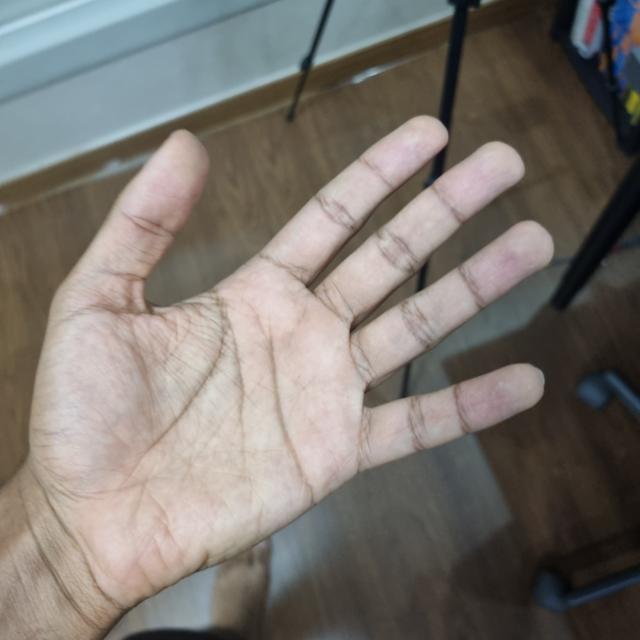

In [ ]:
from IPython.display import Image

Image(filename='/content/test.jpg', height=640)

In [ ]:
!yolo task=detect mode=predict conf=0.50 save=True model=/content/drive/MyDrive/Yolo-results/RPSS2/train3/weights/best.pt source=/content/test.mp4

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients, 8.2 GFLOPs

video 1/1 (frame 1/449) /content/test.mp4: 192x320 2 Papers, 60.0ms
video 1/1 (frame 2/449) /content/test.mp4: 192x320 2 Papers, 50.3ms
video 1/1 (frame 3/449) /content/test.mp4: 192x320 1 Paper, 55.1ms
video 1/1 (frame 4/449) /content/test.mp4: 192x320 1 Paper, 51.0ms
video 1/1 (frame 5/449) /content/test.mp4: 192x320 (no detections), 48.9ms
video 1/1 (frame 6/449) /content/test.mp4: 192x320 (no detections), 55.9ms
video 1/1 (frame 7/449) /content/test.mp4: 192x320 (no detections), 49.8ms
video 1/1 (frame 8/449) /content/test.mp4: 192x320 (no detections), 49.7ms
video 1/1 (frame 9/449) /content/test.mp4: 192x320 (no detections), 52.4ms
video 1/1 (frame 10/449) /content/test.mp4: 192x320 (no detections), 51.8ms
video 1/1 (frame 11/449) /content/test.mp4: 192x320 (no detections), 55.1ms
video 1/1 (frame 12/449) /content/te